#### `Import Libraries`

In [70]:
import pandas as pd 
import numpy as np 
import os 
import json
import sys 
import datetime
import warnings 
import copy
import itertools
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

warnings.filterwarnings("ignore")
%matplotlib inline

### `Sample Data`

- `Reference Data for Next Text Prediction`

In [1]:
ref_data = '''weather is good. play cricket. weather is good to play. people playing in ground. to play in ground. to play cricket in ground. nice weather to play in ground.
              best time to play in ground. nice weather to play in ground. good weather to play cricket in ground. shall we play cricket in ground?'''
print(ref_data)

weather is good. play cricket. weather is good to play. people playing in ground. to play in ground. to play cricket in ground. nice weather to play in ground.
              best time to play in ground. nice weather to play in ground. good weather to play cricket in ground. shall we play cricket in ground?


- `Data Split`

In [3]:
text_corpus = ref_data.split()
print(text_corpus)

['weather', 'is', 'good.', 'play', 'cricket.', 'weather', 'is', 'good', 'to', 'play.', 'people', 'playing', 'in', 'ground.', 'to', 'play', 'in', 'ground.', 'to', 'play', 'cricket', 'in', 'ground.', 'nice', 'weather', 'to', 'play', 'in', 'ground.', 'best', 'time', 'to', 'play', 'in', 'ground.', 'nice', 'weather', 'to', 'play', 'in', 'ground.', 'good', 'weather', 'to', 'play', 'cricket', 'in', 'ground.', 'shall', 'we', 'play', 'cricket', 'in', 'ground?']


- `Key Pair Formation Based on Current & Next Word`

In [4]:
def get_word_pairs(text_corpus):
    ''' 
    This functions reads Text Corpus and creates word-pairs
    Word Pair : Present Word, Next Word
    '''
    for i in range(len(text_corpus) - 1):
        yield (text_corpus[i], text_corpus[i+1])

In [44]:
##### Creating Word Pairs #####
word_pairs = get_word_pairs(text_corpus)

##### Creating Word Pairs Dictionary #####
key_pairs_dictr = {}
for word1, word2 in word_pairs:
    if word1 in key_pairs_dictr.keys():
        # print("     >> Inside If")
        # print("       ", word1, ", ", word2)
        temp_list = []
        temp_data = key_pairs_dictr[word1]
        ##### If Key has single value
        if type(temp_data)==str:
            temp_list.append(temp_data)
            temp_list.append(word2)
            key_pairs_dictr[word1] = temp_list
        ##### If Key has multiple list values    
        else:
            temp_data.append(word2)
            key_pairs_dictr[word1] = temp_data
    else:
        # print("     >> Inside Else")
        key_pairs_dictr[word1] = word2

print("Key Pairs[i.e., Present Word --> Next Word] Occurance : ")
print("--"*25)
print(key_pairs_dictr)

Key Pairs[i.e., Present Word --> Next Word] Occurance : 
--------------------------------------------------
{'weather': ['is', 'is', 'to', 'to', 'to'], 'is': ['good.', 'good'], 'good.': 'play', 'play': ['cricket.', 'in', 'cricket', 'in', 'in', 'in', 'cricket', 'cricket'], 'cricket.': 'weather', 'good': ['to', 'weather'], 'to': ['play.', 'play', 'play', 'play', 'play', 'play', 'play'], 'play.': 'people', 'people': 'playing', 'playing': 'in', 'in': ['ground.', 'ground.', 'ground.', 'ground.', 'ground.', 'ground.', 'ground.', 'ground?'], 'ground.': ['to', 'to', 'nice', 'best', 'nice', 'good', 'shall'], 'cricket': ['in', 'in', 'in'], 'nice': ['weather', 'weather'], 'best': 'time', 'time': 'to', 'shall': 'we', 'we': 'play'}


- `Key Pairs Occurance Probabilities`

In [45]:
##### Occurance Counts #####
key_pairs_dictr_occur_count = {}
for key in key_pairs_dictr.keys():
    dictr_data = key_pairs_dictr[key]
    if type(dictr_data)==list:
        dictr_occur = dict(Counter(dictr_data))
        # print(key,"-->",dictr_occur)
        key_pairs_dictr_occur_count[key] = dictr_occur
    else:
        # print(key,"-->",dictr_data)     
        key_pairs_dictr_occur_count[key] = {dictr_data:1}   

##### Occurance Probabilities #####
key_pairs_dictr_occur_probs = {k:{k1:round(v1/sum(v.values()),3) for k1,v1 in v.items()} for k,v in key_pairs_dictr_occur_count.items()}  
print("Key Pairs Occurance Probabilities : ")
print("--"*20)
print(key_pairs_dictr_occur_probs)      

Key Pairs Occurance Probabilities : 
----------------------------------------
{'weather': {'is': 0.4, 'to': 0.6}, 'is': {'good.': 0.5, 'good': 0.5}, 'good.': {'play': 1.0}, 'play': {'cricket.': 0.125, 'in': 0.5, 'cricket': 0.375}, 'cricket.': {'weather': 1.0}, 'good': {'to': 0.5, 'weather': 0.5}, 'to': {'play.': 0.143, 'play': 0.857}, 'play.': {'people': 1.0}, 'people': {'playing': 1.0}, 'playing': {'in': 1.0}, 'in': {'ground.': 0.875, 'ground?': 0.125}, 'ground.': {'to': 0.286, 'nice': 0.286, 'best': 0.143, 'good': 0.143, 'shall': 0.143}, 'cricket': {'in': 1.0}, 'nice': {'weather': 1.0}, 'best': {'time': 1.0}, 'time': {'to': 1.0}, 'shall': {'we': 1.0}, 'we': {'play': 1.0}}


- `Json View`

In [48]:
print(json.dumps(key_pairs_dictr_occur_probs, indent=6))

{
      "weather": {
            "is": 0.4,
            "to": 0.6
      },
      "is": {
            "good.": 0.5,
            "good": 0.5
      },
      "good.": {
            "play": 1.0
      },
      "play": {
            "cricket.": 0.125,
            "in": 0.5,
            "cricket": 0.375
      },
      "cricket.": {
            "weather": 1.0
      },
      "good": {
            "to": 0.5,
            "weather": 0.5
      },
      "to": {
            "play.": 0.143,
            "play": 0.857
      },
      "play.": {
            "people": 1.0
      },
      "people": {
            "playing": 1.0
      },
      "playing": {
            "in": 1.0
      },
      "in": {
            "ground.": 0.875,
            "ground?": 0.125
      },
      "ground.": {
            "to": 0.286,
            "nice": 0.286,
            "best": 0.143,
            "good": 0.143,
            "shall": 0.143
      },
      "cricket": {
            "in": 1.0
      },
      "nice": {
            "weather"

- `Words Occurance Graph Plot`

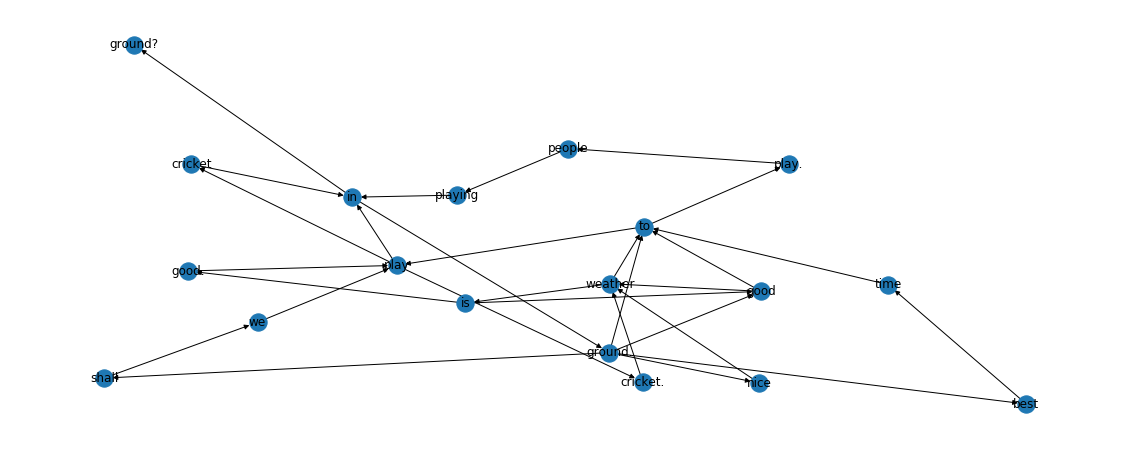

In [83]:
##### Create Graph Plot #####
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
g = nx.DiGraph()
# g.add_nodes_from(["a", "b"])
# g.add_edge("a","b")
# key_pairs_dictr_occur_probs
# key_pairs_dictr_occur_probs.keys()
g.add_nodes_from([*key_pairs_dictr_occur_probs]) # key_pairs_dictr_occur_probs keys
for master_key in [*key_pairs_dictr_occur_probs]:
    [g.add_edge(master_key,child_key) for child_key in [*key_pairs_dictr_occur_probs[master_key]]]
nx.draw(g,with_labels=True)
plt.draw()
plt.show()

- `Test Case`

In [49]:
##### complete sentence, we want to test is : "good weather to play cricket in ground" 
test_data = "good weather"
print(test_data)

good weather


In [50]:
test_words_list = test_data.split()
print("test_words_list --> ", test_words_list)

test_words_list -->  ['good', 'weather']


In [52]:
predict_words_n = 5
chain_list = test_words_list
print("Chain List --> ", chain_list)

Chain List -->  ['good', 'weather']


In [58]:
######################################################################################################### 
# Predicting Next Word Based on Current Word : Next word would be looked up from key-pair dictionary & 
# selected highest probability value from list of values, instead of random choice 
#########################################################################################################
counter = 1
while counter <= predict_words_n:
    # print(chain_list[-1], key_pairs_dictr_occur_probs[chain_list[-1]], max(key_pairs_dictr_occur_probs[chain_list[-1]], key=key_pairs_dictr_occur_probs[chain_list[-1]].get))
    chain_list.append( # For example --> key(weather)
        max(key_pairs_dictr_occur_probs[chain_list[-1]], # Gets occurance value list based on key --> {'is': 0.4, 'to': 0.6}
            key=key_pairs_dictr_occur_probs[chain_list[-1]].get) # Finds max value(key) out of value list "to"
    )
    counter += 1

print("Next 5 Predicted Words --> ", chain_list)

Next 5 Predicted Words -->  ['good', 'weather', 'to', 'play', 'in', 'ground.', 'to']


### `Observation`
 - Here we are predicting next word/state based on current word, by finding the word that occured next w.r.t to current word, most of the times when current word occured. 
 - Here instead of random choice, we are going based on probability values.

#### `Reference Articles`
- https://python.plainenglish.io/word-prediction-with-markov-chains-in-python-d685eed4b0b3
- https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial
- https://www.machinelearningplus.com/markov-chain/
- https://www.upgrad.com/blog/markov-chain-in-python-tutorial/
- https://ericmjl.github.io/essays-on-data-science/machine-learning/markov-models/
- http://www.blackarbs.com/blog/introduction-hidden-markov-models-python-networkx-sklearn/2/9/2017
- https://pythonhosted.org/prob140/pykov_tutorial.html
- https://linuxtut.com/en/4edd10a06d1c606aaef4/
- https://linuxtut.com/en/673b6ad920329875823c/
- https://stackoverflow.com/questions/32375679/ipython-notebook-plotting-transition-diagrams